In [324]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [325]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans

In [326]:
# Import My own library for factor testing
from SingleFactorTest import factorFilterFunctions as ff
#from config import *

In [327]:
%matplotlib inline

In [328]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [329]:
# make sure that matplotib and seaborn can show Chinese
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [330]:
# Files to use 
filenamePrice = 'Own_Factor_AdjustedPriceForward-1d.csv'
filenameST = 'LZ_CN_STKA_SLCIND_ST_FLAG.h5'
filenameTradeday = 'LZ_CN_STKA_SLCIND_TRADEDAYCOUNT.h5'
filenameStopFlag = 'LZ_CN_STKA_SLCIND_STOP_FLAG.h5'
filenameIndu = 'LZ_GPA_INDU_ZX.csv'
filenameFCAP =  'LZ_CN_STKA_VAL_A_FCAP.h5'
filenameAdjustFactor = 'LZ_CN_STKA_CMFTR_CUM_FACTOR.h5'
filenameHS300 = 'LZ_CN_STKA_INDXQUOTE_CLOSE.h5'
filenameZXIndustry = 'LZ_CN_STKA_INDU_ZX.h5'  # 各股票对应的行业
filenameZXExplanation = 'LZ_GPA_TMP_INDU_ZX.csv'

In [331]:
# Factors
# Value factor
filenamePE ='LZ_GPA_VAL_PE.csv'  # 市盈率   012-2016 Cum return 0.9(group1),1.4(group8) monotonicity: Normal
filenamePB ='LZ_GPA_VAL_PB.csv'  # 市净率   012-2016 Cum return 1.1(group2),0.1(group9) monotonicity: Good+
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率   012-2016 Cum return 0.9(group0),0.3(group9) monotonicity: Good+
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率   2012-2016 Cum return 0.95(group0),0.35(group8) monotonicity: Normal
filenameADJPB ='Own_Factor_AdjustedPB-1d.csv' # 市值调整市净率 2012-2016 Cum return 1.1(group2),0.2(group9) monotonicity: Normal

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%) 2012-2016 Cum return 1.1(group8),0.41(group1) monotonicity: Good+
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%) 2012-2016 Cum return 1.2(group9),0.2(group1) monotonicity: Good
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%) 2012-2016 Cum return 0.98(group8),0.4(group2) monotonicity: Good
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%) 2012-2016 Cum return 1.17(group7),0.18(group1) monotonicity: Normal
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)  2012-2016 Cum return 0.85(group4),0.5(group0) monotonicity: Normal

# Financial factor
filenameCAPITALIZEDTODA = 'LZ_GPA_FIN_IND_CAPITALIZEDTODA.csv'  # 资本支出/折旧和摊销 2012-2016 Cum return 0.95(group0),0.6(group9) monotonicity: Normal+
filenameCASHRATIO = 'LZ_GPA_FIN_IND_CASHRATIO.csv' # 保守速动比率 2012-2016 Cum return 0.85(group0),0.53(group2) monotonicity: Normal+
filenameCASHTOLIQDEBT = 'LZ_GPA_FIN_IND_CASHTOLIQDEBT.csv' # 货币资金／流动负债 2012-2016 Cum return 0.8(group7),0.6(group8) monotonicity: Normal
filenameOCFTODEBT = 'LZ_GPA_FIN_IND_OCFTODEBT.csv' # 经营活动产生的现金流量净额/负债合计 2012-2016 Cum return 0.8(group0),0.55(group4) monotonicity: Normal
filenamePROFITTOOP = 'LZ_GPA_FIN_IND_PROFITTOOP.csv' # 利润总额／营业收入 2012-2016 Cum return 0.84(group3),0.23(group9) monotonicity: Normal
filenamePROFITTOOPTTM ='LZ_GPA_FIN_DERI_COMBO_EBTTOOR_TTM.csv' # # 利润总额／营业收入(TTM) 2012-2016 Cum return 0.72(group8),0.41(group1) monotonicity: Good

filenameBERYRATIO = 'LZ_GPA_DERI_BerryRatio.csv' #边际毛利/营运开支 2012-2016  monotonicity: bad ,not useful at all

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量 2012-2016 Cum return 1.0(group3), - 0.3(group9) monotonicity: Normal+
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转 2012-2016 Cum return 0.85(group0), - 0.2(group9) monotonicity: Good
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转 2012-2016 Cum return 0.65(group7), 0.4(group9) monotonicity: Normal
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度  2012-2016 Cum return 0.47(group0), -0.3(group9) monotonicity: Good
filenameABORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量  2012-2016 Cum return 0.7(group0), 0.1(group9) monotonicity: Normal
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv' # 斜率   2012-2016 Cum return 1.1(group0), 0.25(group8) monotonicity: Good+
filenameMACD = 'LZ_GPA_DERI_MACD.csv'  # MACD   2012-2016 Cum return 0.8(group3), -0.4(group9) monotonicity: Normal
finenameBB = 'LZ_GPA_DERI_BB_20.csv'  # Bolling_bands  2012-2016 Cum return 0.75(group3) , 0.05(group9)  monotonicity: Normal 

# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值 2012-2016 Cum return 0.7(group4) , 0.1(group9)  monotonicity: Normal 
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'    #  日均成交额   2012-2016 Cum return 1.52(group0) , -0.27(group9)  monotonicity: Perfect
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'         # 非流动性因子  2012-2016 Cum return 1.5(group9), - 0.07(group1) monotonicity: Perfect
filenameTURNOVER = 'LZ_GPA_VAL_TURN.csv'    # 换手率 2012-2016 Cum return  0.78(group6), - 0.25(group9) monotonicity: Normal（除了第九组外其他差不多）
filenameOWNILLIQ ='Own_Factor_ILLQ-1d.csv' # 非流动性 2012-2016 Cum return 1.5(group9), - 0.25(group0) monotonicity: Perfect
filenameADJILLIQ = 'Own_Factor_ADJ_ILLQ_1D.csv' # 非流动性(市值调整) 
filenameADJTURNOVER = 'LZ_GPA_DERI_adjustedTurnOver_20.csv' # 市值调整日均成交额 2012-2016 Cum return 1.25(group0), - 0.5(group9) monotonicity: Perfect

# Volatility factor
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动   2012-2016 Cum return  0.65(group8), 0.4(group1) monotonicity : Normal
filenameOwnVol = 'Own_Factor_Volatility_90d.csv'   # 90天收益波动率     2012-2016 Cum return 0.65(group1), - 0.26(group9) monotonicity: Good
filenameAbove20 = 'Own_Factor_Above20MA_20d.csv'  # 高于20天MA的价格平均 2012-2016 Cum return 0.8(group1) , -0.4(group9)  monotonicity：Good

filenameTOV20 = 'Own_Factor_Turnover_Volatility_20D.csv' # 20天换手率波动率
filenameADJTOV20 = 'Own_Factor_ADJ_Turnover_Volatility_20D.csv' # 20天换手率波动率（市值调整） 2012-2016 Cum return 1.8(group0), -0.3(group9) monotonicity: perfect
filenameTOVD20 = 'Own_Factor_Turnover_Volatility_deviation_20D.csv' # 20天换手率均值除500天换手率均值-1
filenameADJTOVD20 = 'Own_Factor_ADJ_Turnover_Volatility_Deviation_20D.csv' # 20天换手率均值除500天换手率均值-1(市值调整)  Cum return 0.7(group0), -0.2(group9)Good

In [347]:
#
#filenameSpecificVol = 'Own_Factor_Specific_Volatility.csv' # 特质波动率
filenameAroon = 'Aroon_Allstocks.csv' 
filenameAdjTOTrue = 'Own_Factor_AdjustedTurnOver-1d.csv'# 真市值调整换手率 2012-2016 Cum return 1.0(group7), - 0.4(group9) monotonicity: Normal
filenameDDA = 'Own_Factor_DDA-1d.csv'  # 股票每日成交额(前复权)  2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filennameQFAEPS = 'LZ_GPA_FIN_IND_QFA_EPS.csv' # 单季度每股收益
filenameDDA20 = 'Own_Factor_DDA-20d.csv' # DDA二十天均值   2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filenameADJDDA20 ='Own_Factor_ADJ_DDA_20D.csv' # 中性化（仅去市值）后的DDA20
filenameIDIVOL = 'Own_Factor_Idiosyncratic_Volatility.csv' # 特异波动率  2012-2016 Cum return 0.9(group1), 0(group9) monotonicity: Good+
filenameOwnSkewness = 'Own_Factor_Skewness_250d.csv'  # 250日偏度
filenameOwnReturnSkew = 'Own_Factor_Return_Skew_250D.csv' # 250日收益率偏度
filenamePPO ='LZ_GPA_DERI_PPO.csv' #
filename_5_20_deviation = 'Own_Factor_5_20_price_deviation_1D.csv'  #  5日价格平均除以20日价格平均
filename_5_20_return_deviation = 'Own_Factor_5_20_return_deviation_1D.csv'  # 5日平均收益除以20日平均收益
filenameSharpe = 'Own_Factor_sharpe_ratio_20D.csv'  # 20日夏普比率
filenameDownsideRisk = 'Own_Factor_downside_risk_252D.csv' # 252日下行波动率  不太好的因子
filenameSortinoRatio = 'Own_Factor_sortino_ratio_20D.csv'  # 20日sortino比率   不太好的因子
filenameOwnMassIndex = 'OwnfactorMassIndex.h5'   # mass index  比较优秀的因子,和市值不太相关，前几组区分的不算开（group1-group3），但后面几组区分的很好。

In [348]:
# Uqer factor
filenameUQAD20 = 'Uqer_factor_AD20.csv'    #累积/派发线（Accumulation / Distribution Line)的20日均线
filenameUQADTM = 'Uqer_factor_ADTM.csv'    #动态买卖气指标，用开盘价的向上波动幅度和向下波动幅度的距离差值来描述人气高低的指标。属于情绪类因子
filenameUQATR6 = 'Uqer_factor_ATR6.csv'    #6日均幅指标（Average TRUE Ranger），取一定时间周期内的股价波动幅度的移动平均值 （# perfect!）
filenameUQAroon = 'Uqer_factor_Aroon.csv'   #Aroon通过计算自价格达到近期最高值和最低值以来所经过的期间数
filenameUQBias10 = 'Uqer_factor_BIAS10.csv' # 10日乖离率，简称Y值，是移动平均原理派生的一项技术指标，表示股价偏离趋向指标斩百分比值
filenameUQCCI10 = 'Uqer_factor_CCI10.csv'   # 10日顺势指标（Commodity Channel Index），专门测量股价是否已超出常态分布范围(效果不太理想)
filenameUQKDJ_K = 'Uqer_factor_KDJ_K.csv'   #随机指标。它综合了动量观念、强弱指标及移动平均线的优点，用来度量股价脱离价格正常范围的变异程度。（不理想0
filenameUQROC6 = 'Uqer_factor_ROC6.csv' #6日变动速率（Price Rate of Change），以当日的收盘价和N天前的收盘价比较
filenameUQRVI = 'Uqer_factor_RVI.csv' # 相对离散指数（Relative Volatility Index）
filenameUQCMO = 'Uqer_factor_CMO.csv' # 钱德动量摆动指标（Chande Momentum Osciliator）  # 相当不错的因子，单调性相当好！特别是分行业之后！
filenameUQRSI = 'Uqer_factor_RSI.csv'  # 相对强弱指标（Relative Strength Index）   或许还可以？
filenameUQSkewness = 'Uqer_factor_Skewness.csv' # 过去20个交易日股价的偏度，分行业后又不错的单调性
filenameUQOBV20 = 'Uqer_factor_OBV20.csv'   # 20日能量潮指标（On Balance Volume，OBV） 非常棒的因子（但与市值因子相关性太高）
filenameUQMTM ='Uqer_factor_MTM.csv'   # 动量指标（Momentom Index） 中间组（group4，group5）比较好，或许可以当作检验因子？
filenameUQPVT6 = 'Uqer_factor_PVT6.csv'  # 价量趋势（Price and Volume Trend）指标    中间组效果较好（可当作检验因子，3组，4组）
filenameUQREC = 'Uqer_factor_REC.csv'     # 析师推荐评级（Recommended rating score by analyst  没有单调性，第九组最好，可以当作一个选股的检验因子
filenameUQDAREC = 'Uqer_factor_DAREC.csv'   # 分析师推荐评级变化，相比于60个交易日前。 没有单调性，但第九组最好
filenameUQGREC = 'Uqer_factor_GREC.csv'    # 分析师推荐评级变化趋势,过去60个交易日内的DAREC 符号加和. 第五组最好，单调性不太好
filenameUQREVS20 = 'Uqer_factor_REVS20.csv'  # 股票的20日收益   perfect! 很好的因子！并且与市值因子相关性不大！
filenameUQREVS5 ='Uqer_factor_REVS5.csv'  # 股票的5日收益  不错，但不如20日收益
filenameUQMA10RegressCoeff12 = 'Uqer_factor_MA10RegressCoeff12.csv' # 10日价格平均线12日线性回归系数  单调性还不错，从第三组开始基本单调（第三组最好）
filenameUQWVAD = 'Uqer_factor_WVAD.csv' # 威廉变异离散量（William's variable accumulation distribution），是一种将成交量加权的量价指标 相当不错的因子
                                        # 从group 1 开始单调性明显（最好的组为group2 ,group3），特别是分了行业之后的
filenameUQHurst = 'Uqer_factor_Hurst.csv'  # 赫斯特指数   不错的因子（和市值因子没啥相关性），单调性不错（group9在最好），特别是分行业之后效果更明显
filenameUQMassIndex = 'Uqer_factor_MassIndex.csv'  # 梅斯线（Mass Index），本指标是Donald Dorsey累积股价波幅宽度之后所设计的震荡曲线。其最主要的作用，在于寻找飙涨股或者极度弱势股的重要趋势反转点。属于常用技术指标类因子
                                                   # 波动率指标，单调性不错，group1在最上面，group9在最下面。
filenameUQKlingerOscillator = 'Uqer_factor_KlingerOscillator.csv'  # 成交量摆动指标.单调性一般，俩头差中间好，或许可用来选股。

In [349]:
# Not good factors but maybe useful
filenameOVERVOL = 'Over_Heat_Volume.csv' 
filenameSIZE = 'LZ_GPA_VAL_A_FCAP.csv'
filenameExcessReturn = 'Own_Factor_excess_return_20D.csv'
filenameROE = 'LZ_GPA_FIN_IND_ROE.csv'

In [350]:
# ROE x日 波动率
filenameRoeVol60 = 'Own_Factor_ROE_Volatility_60D.csv'   # 和预期不符
filenameRoeVol120 = 'Own_Factor_ROE_Volatility_120D.csv'  # 符合预期，即ROE波动小的组收益较好,单调性不明显
filenameRoeVol250 = 'Own_Factor_ROE_Volatility_250D.csv'   # 符合预期，单调性非常好，描述ROE波动率可用此因子！good+!

In [351]:
# Non_linear factor
filenameNLFCAP ='Own_Factor_Non_Linear_Size.1D.csv'  # 效果很完美，但是与市值因子相关性接近-1，可能还是受小市值影响？
filenameBeta  = 'Own_Factor_Beta_1D.csv'   # 贝塔因子

In [444]:
# Constants
startTime =  datetime.strptime('20100101', '%Y%m%d')
endTime = datetime.strptime('20170928', '%Y%m%d')

path = ff.data_path
timeStampNum = 2500
thresholdNum = 0.2
HS300Index ='000300.SH' # HS300 index code
ZZ500Index = '000905.SH' #   ZZ500 index code

In [445]:
# for csv file
'''
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
indusDF = pd.read_csv(path+filenameZXIndustry,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
induExplanation = pd.read_csv(path+filenameZXExplanation,infer_datetime_format=True,parse_dates=[0],encoding='gb2312')
'''

"\nstDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]\ntradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]\nstopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]\nindusDF = pd.read_csv(path+filenameZXIndustry,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]\ninduExplanation = pd.read_csv(path+filenameZXExplanation,infer_datetime_format=True,parse_dates=[0],encoding='gb2312')\n"

In [446]:
# for h5 file
stDF = ff.readh5data(path,filenameST).loc[startTime:endTime]
tradeDayDF = ff.readh5data(path,filenameTradeday).loc[startTime:endTime]
stopFlagDF = ff.readh5data(path,filenameStopFlag).loc[startTime:endTime]
indusDF = ff.readh5data(path,filenameZXIndustry).loc[startTime:endTime]
induExplanation = pd.read_csv(path+filenameZXExplanation,infer_datetime_format=True,parse_dates=[0],encoding='gb2312')

In [447]:
#
sololist = [filenameOwnMassIndex ]
#
filenameDict = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF, 'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT, \
                'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'TURNOVER_1M':filenameTURNOVER1M }

In [448]:
induExplanation

LZ_GPA_TMP_INDU_ZX-t
0                  石油石化
1                    煤炭
2                  有色金属
3               电力及公用事业
4                    钢铁
5                  基础化工
6                    建筑
7                    建材
8                  轻工制造
9                    机械
10                 电力设备
11                 国防军工
12                   汽车
13                 商贸零售
14                 餐饮旅游
15                   家电
16                 纺织服装
17                   医药
18                 食品饮料
19                 农林牧渔
20                   银行
21                非银行金融
22                  房地产
23                 交通运输
24                电子元器件
25                   通信
26                  计算机
27                   传媒
28                   综合

In [449]:
explanationDict = induExplanation.iloc[:,0].to_dict()

In [450]:
explanationDict

{0: u'\u77f3\u6cb9\u77f3\u5316',
 1: u'\u7164\u70ad',
 2: u'\u6709\u8272\u91d1\u5c5e',
 3: u'\u7535\u529b\u53ca\u516c\u7528\u4e8b\u4e1a',
 4: u'\u94a2\u94c1',
 5: u'\u57fa\u7840\u5316\u5de5',
 6: u'\u5efa\u7b51',
 7: u'\u5efa\u6750',
 8: u'\u8f7b\u5de5\u5236\u9020',
 9: u'\u673a\u68b0',
 10: u'\u7535\u529b\u8bbe\u5907',
 11: u'\u56fd\u9632\u519b\u5de5',
 12: u'\u6c7d\u8f66',
 13: u'\u5546\u8d38\u96f6\u552e',
 14: u'\u9910\u996e\u65c5\u6e38',
 15: u'\u5bb6\u7535',
 16: u'\u7eba\u7ec7\u670d\u88c5',
 17: u'\u533b\u836f',
 18: u'\u98df\u54c1\u996e\u6599',
 19: u'\u519c\u6797\u7267\u6e14',
 20: u'\u94f6\u884c',
 21: u'\u975e\u94f6\u884c\u91d1\u878d',
 22: u'\u623f\u5730\u4ea7',
 23: u'\u4ea4\u901a\u8fd0\u8f93',
 24: u'\u7535\u5b50\u5143\u5668\u4ef6',
 25: u'\u901a\u4fe1',
 26: u'\u8ba1\u7b97\u673a',
 27: u'\u4f20\u5a92',
 28: u'\u7efc\u5408'}

In [451]:
sololist[0]

'OwnfactorMassIndex.h5'

In [452]:
if 'Uqer' in sololist[0]:
    sparedata = pd.read_csv(path+sololist[0],infer_datetime_format=True,parse_dates=[0],index_col=0)
else:
    sparedata = ff.readh5data(path,sololist[0])

In [453]:
sparedata.tail()

000005.SZ  600601.SH  600602.SH  600651.SH  600652.SH  600653.SH  \
date                                                                           
2017-10-09  26.166689  24.957976  24.588205  25.374702  23.966425  28.683980   
2017-10-10  25.939140  25.008622  24.935180  25.152072  24.048664  27.630951   
2017-10-11  25.758866  25.015959  25.219817  25.053443  24.200261  26.932546   
2017-10-12  25.714062  25.040495  25.472951  24.997603  24.257936  26.418540   
2017-10-13        NaN        NaN        NaN        NaN        NaN        NaN   

            600654.SH  600656.SH  000004.SZ  000002.SZ    ...      603367.SH  \
date                                                      ...                  
2017-10-09   8.805252        NaN  24.908721  28.102123    ...            NaN   
2017-10-10  11.490247        NaN  25.223758  27.788863    ...            NaN   
2017-10-11  13.494596        NaN  25.585967  27.591273    ...            NaN   
2017-10-12  15.097124        NaN  25.792155  27.405281    ...            NaN   
2017-10-13        NaN        NaN        NaN        NaN    ...            NaN   

            300705.SZ  300707.SZ  603103.SH  002903.SZ  002906.SZ  603110.SH  \
date                                                                           
2017-10-09        NaN        NaN        NaN        NaN        NaN        NaN   
2017-10-10        NaN        NaN        NaN        NaN        NaN        NaN   
2017-10-11        NaN        NaN        NaN        NaN        NaN        NaN   
2017-10-12        NaN        NaN        NaN        NaN        NaN        NaN   
2017-10-13        NaN        NaN        NaN        NaN        NaN        NaN   

            002905.SZ  300708.SZ  603499.SH  
date                                         
2017-10-09        NaN        NaN        NaN  
2017-10-10        NaN        NaN        NaN  
2017-10-11        NaN        NaN        NaN  
2017-10-12        NaN        NaN        NaN  
2017-10-13        NaN        NaN        NaN  

[5 rows x 3486 columns]

In [454]:
# adjust the columns name of the Uqer data same as the own factor
if 'Uqer' in sololist[0]: 
    uqercolumnList = sparedata.columns.tolist()
    uqercolumnName = [x.split('.')[0] for x in uqercolumnList]
    newcolumnList = stDF.columns.tolist()
    newcolumnName = [x.split('.')[0] for x in newcolumnList]
    columndict = dict(zip(newcolumnName,newcolumnList))
    finalcolumns = []
    for stk in uqercolumnName:
        if stk in newcolumnName:
            stk = columndict[stk]
        else:
            pass
        finalcolumns.append(stk)
    sparedata.columns = finalcolumns
    addNanColumns = list(set(newcolumnList) - set(sparedata.columns))
    addData = pd.DataFrame(index = sparedata.index,columns = addNanColumns,dtype =float)
    sparedata = pd.concat([sparedata,addData],axis=1)
    sparedata = sparedata[newcolumnList]

In [455]:
## easy way to calculate the last day of the month
#stDF['label'] = stDF.index.map(lambda x: (x.year,x.month))
#locationList=(stDF.groupby(['label']).size().cumsum()-1).values
#stDF.iloc[locationList].index
#stDF.groupby(['label'])

In [456]:
# Using pd.read_csv method since the adjusted price data is in csv format
priceData =  pd.read_csv(path+ filenamePrice ,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
#benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime][ZZ500Index]

In [457]:
# Read h5data since the benchmarkData is the h5 file

#priceData = ff.readh5data(path, filenamePrice).loc[startTime:endTime]
benchMarkData = ff.readh5data(path, filenameHS300).loc[startTime:endTime][ZZ500Index]

In [458]:
LFCAPDF = np.log10(ff.getData(thresholdNum, startTime, endTime,filename = filenameFCAP))

In [459]:
#fs = np.log10(pd.read_csv(path+ filenameFCAP ,infer_datetime_format=True,parse_dates=[0],index_col=0))

#fs[fs>fs.quantile(0.9,axis=1)] = np.NaN
#fs.to_csv(path+'Own_factor_Nonlinear_FCAP.csv',na_rep='NaN',date_format='%Y%m%d')

In [460]:
#fs[fs<fs.quantile(0.4,axis=1)]

In [461]:
endOfMonthList = ff.getLastDayOfMonth(LFCAPDF.index)[1]

In [462]:
# calculate correlation between two factors
if  'Uqer' in sololist[0]:
    factor1 = sparedata.loc[startTime:endTime]
else:
    #factor1 = pd.read_csv(path+sololist[0],infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
    factor1 = ff.readh5data(path,sololist[0])
correlationDF = ff.showCorrelation(factor1,LFCAPDF, endOfMonthList, filterdic = None).astype(float)
correlationDF.describe()

Pearson   Spearman
count  93.000000  93.000000
mean    0.052887   0.033472
std     0.068203   0.126289
min    -0.076470  -0.202666
25%     0.001093  -0.041300
50%     0.053524   0.028191
75%     0.095033   0.101515
max     0.245109   0.428841

In [463]:
factor1.tail()

000005.SZ  600601.SH  600602.SH  600651.SH  600652.SH  600653.SH  \
date                                                                           
2017-10-09  26.166689  24.957976  24.588205  25.374702  23.966425  28.683980   
2017-10-10  25.939140  25.008622  24.935180  25.152072  24.048664  27.630951   
2017-10-11  25.758866  25.015959  25.219817  25.053443  24.200261  26.932546   
2017-10-12  25.714062  25.040495  25.472951  24.997603  24.257936  26.418540   
2017-10-13        NaN        NaN        NaN        NaN        NaN        NaN   

            600654.SH  600656.SH  000004.SZ  000002.SZ    ...      603367.SH  \
date                                                      ...                  
2017-10-09   8.805252        NaN  24.908721  28.102123    ...            NaN   
2017-10-10  11.490247        NaN  25.223758  27.788863    ...            NaN   
2017-10-11  13.494596        NaN  25.585967  27.591273    ...            NaN   
2017-10-12  15.097124        NaN  25.792155  27.405281    ...            NaN   
2017-10-13        NaN        NaN        NaN        NaN    ...            NaN   

            300705.SZ  300707.SZ  603103.SH  002903.SZ  002906.SZ  603110.SH  \
date                                                                           
2017-10-09        NaN        NaN        NaN        NaN        NaN        NaN   
2017-10-10        NaN        NaN        NaN        NaN        NaN        NaN   
2017-10-11        NaN        NaN        NaN        NaN        NaN        NaN   
2017-10-12        NaN        NaN        NaN        NaN        NaN        NaN   
2017-10-13        NaN        NaN        NaN        NaN        NaN        NaN   

            002905.SZ  300708.SZ  603499.SH  
date                                         
2017-10-09        NaN        NaN        NaN  
2017-10-10        NaN        NaN        NaN  
2017-10-11        NaN        NaN        NaN  
2017-10-12        NaN        NaN        NaN  
2017-10-13        NaN        NaN        NaN  

[5 rows x 3486 columns]

In [464]:
#%lprun -f ff.getLastDayOfMonth ff.getLastDayOfMonth(LFCAPDF.index)

In [465]:
activeReturnData = ff.calcReturn(priceData, endOfMonthList, benchmark = benchMarkData,activeReturn = True,logReturn = False)

In [466]:
# Generate the useles stock list
filterdict={}
for i in endOfMonthList:
    suspendList = ff.GetSTNewSuspend(i,stDF,tradeDayDF,stopFlagDF)
    filterdict[i] = suspendList
    print i, len(filterdict[i])

2010-01-29 00:00:00 2007
2010-02-26 00:00:00 2019
2010-03-31 00:00:00 1995
2010-04-30 00:00:00 1967
2010-05-31 00:00:00 1948
2010-06-30 00:00:00 1917
2010-07-30 00:00:00 1877
2010-08-31 00:00:00 1838
2010-09-30 00:00:00 1811
2010-10-29 00:00:00 1796
2010-11-30 00:00:00 1768
2010-12-31 00:00:00 1737
2011-01-31 00:00:00 1717
2011-02-28 00:00:00 1719
2011-03-31 00:00:00 1685
2011-04-29 00:00:00 1665
2011-05-31 00:00:00 1601
2011-06-30 00:00:00 1596
2011-07-29 00:00:00 1541
2011-08-31 00:00:00 1511
2011-09-30 00:00:00 1489
2011-10-31 00:00:00 1457
2011-11-30 00:00:00 1445
2011-12-30 00:00:00 1432
2012-01-31 00:00:00 1404
2012-02-29 00:00:00 1385
2012-03-30 00:00:00 1406
2012-04-27 00:00:00 1434
2012-05-31 00:00:00 1358
2012-06-29 00:00:00 1344
2012-07-31 00:00:00 1261
2012-08-31 00:00:00 1235
2012-09-28 00:00:00 1203
2012-10-31 00:00:00 1178
2012-11-30 00:00:00 1172
2012-12-31 00:00:00 1160
2013-01-31 00:00:00 1153
2013-02-28 00:00:00 1153
2013-03-29 00:00:00 1161
2013-04-26 00:00:00 1155


In [467]:
### Calculate the return of each group of given factor(solo factor)
totalGroupDict ={}
factorData = ff.getData(thresholdNum, startTime, endTime,availableData = factor1)

for date in endOfMonthList:
    factorDataTemp = factorData.loc[:date].tail()
    factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[date]))]
    #print factorDataTemp
    totalGroupDict[date] = ff.getStockGroup(factorDataTemp,groupNum=10,Mean_Num=1)

In [468]:
totalGroupDict

{Timestamp('2010-01-29 00:00:00'): {'group_0': ['000426.SZ',
   '000709.SZ',
   '300016.SZ',
   '000526.SZ',
   '300023.SZ',
   '300028.SZ',
   '300013.SZ',
   '000957.SZ',
   '300006.SZ',
   '300010.SZ',
   '300018.SZ',
   '300007.SZ',
   '600686.SH',
   '600736.SH',
   '300001.SZ',
   '300009.SZ',
   '300021.SZ',
   '300012.SZ',
   '000960.SZ',
   '300026.SZ',
   '300005.SZ',
   '300004.SZ',
   '300022.SZ',
   '600240.SH',
   '600325.SH',
   '300017.SZ',
   '300014.SZ',
   '600658.SH',
   '600657.SH',
   '000046.SZ',
   '600409.SH',
   '600007.SH',
   '300003.SZ',
   '600528.SH',
   '000927.SZ',
   '600393.SH',
   '002180.SZ',
   '000932.SZ',
   '300024.SZ',
   '600322.SH',
   '000918.SZ',
   '002174.SZ',
   '000828.SZ',
   '600208.SH',
   '000609.SZ',
   '600052.SH',
   '601600.SH',
   '002267.SZ',
   '300019.SZ',
   '000014.SZ',
   '000800.SZ',
   '002305.SZ',
   '300008.SZ',
   '600129.SH',
   '600807.SH',
   '002012.SZ',
   '000002.SZ',
   '000707.SZ',
   '000668.SZ',
   '601899.

In [469]:
ReturnDF = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None, dtype =float)
sizeDistribution = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None, dtype =float)
for group in ReturnDF.columns.tolist():
    for time in ReturnDF.index:
        ReturnDF.loc[time][group] = activeReturnData.loc[time][totalGroupDict[time][group]].mean()
        sizeDistribution.loc[time][group] = LFCAPDF.loc[time][totalGroupDict[time][group]].quantile()
ReturnDF.sort_index(axis=1,inplace=True)
sizeDistribution.sort_index(axis=1,inplace=True)

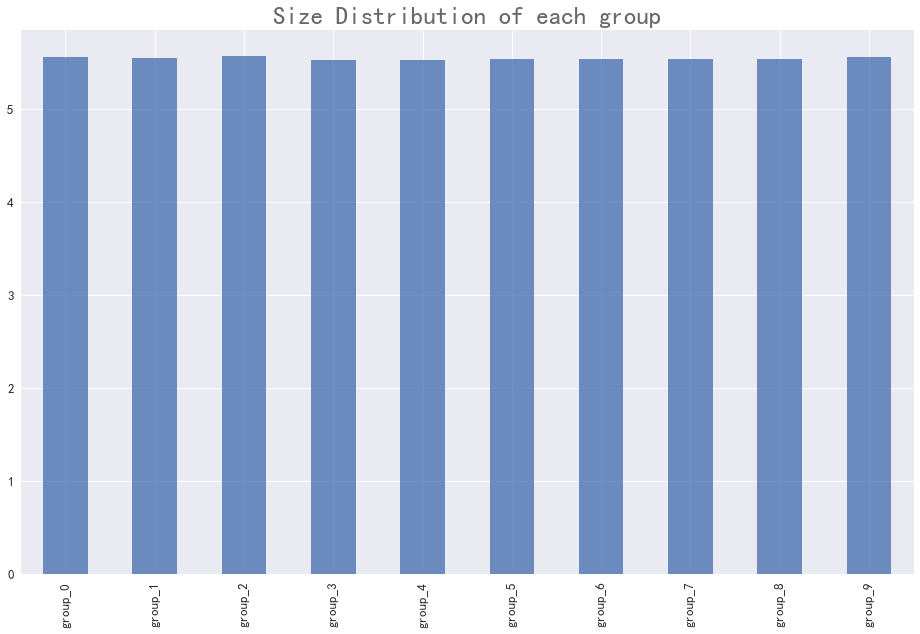

In [470]:
# show size distribution(quantile plot)
fig = plt.figure(figsize=(16,10))
# Add a subplot
ax = fig.add_subplot(111)
sizeDistribution.median().plot(kind='bar',ax = ax, fontsize =13,title ='Size Distribution of each group',alpha =0.8)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=25)

In [471]:
sizeDistribution.quantile()
sizeMono = sizeDistribution.quantile().corr(pd.Series(index = sizeDistribution.quantile().index,data = range(len(sizeDistribution.quantile()))),\
                                           method = 'spearman')
sizeMono

-0.32121212121212117

In [472]:
# Calc spearman correlation to investigate monotonicity
referSeries = pd.Series(index = ReturnDF.columns, data=range(len(ReturnDF.columns)))
monoDF = pd.DataFrame(index = ReturnDF.index, columns=['Spearman_Cor'], dtype = float)
for date in ReturnDF.index:
    monoDF.loc[date] = ReturnDF.loc[date].corr(referSeries,method='spearman')   

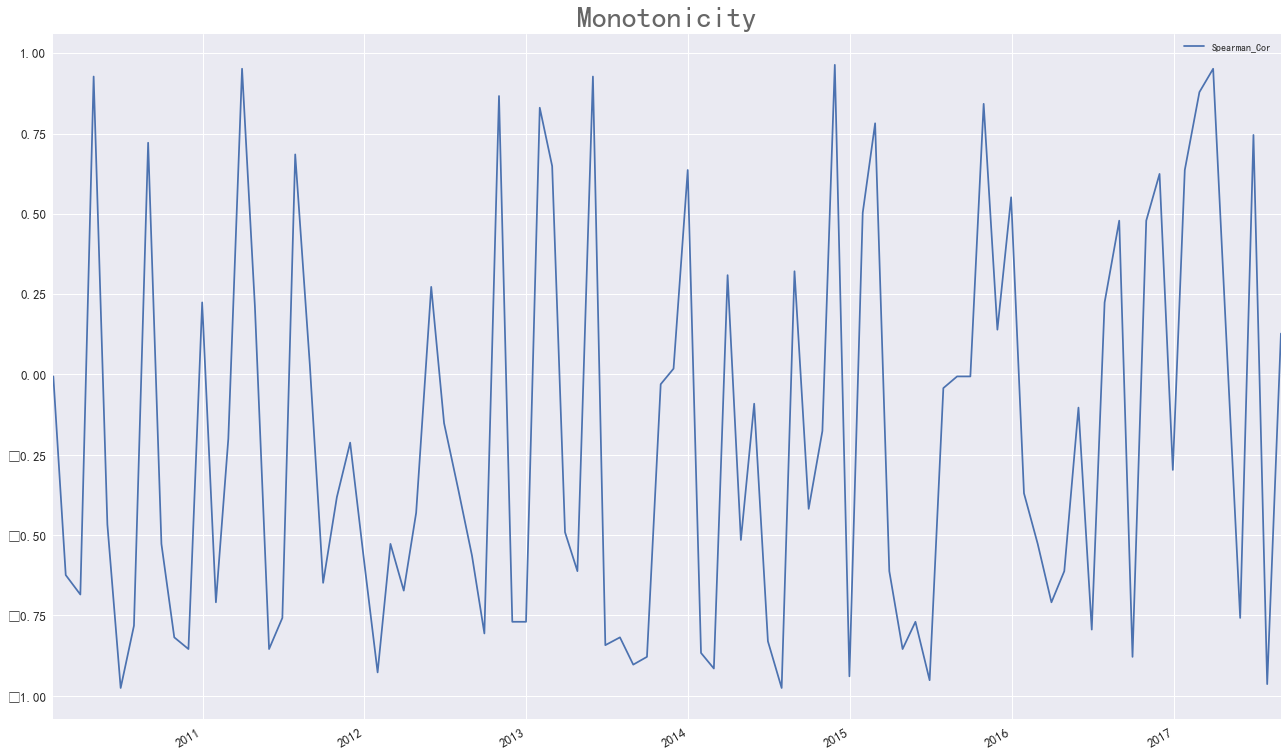

In [473]:
# Plot
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
monoDF.plot(figsize=(22,14),ax=ax,fontsize =13,title ='Monotonicity')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

In [474]:
### Method to calculate moving max drawdown
from numpy.lib.stride_tricks import as_strided
def windowed_view(x, window_size):
    """Creat a 2d windowed view of a 1d array.

    `x` must be a 1d numpy array.

    `numpy.lib.stride_tricks.as_strided` is used to create the view.
    The data is not copied.

    Example:

    >>> x = np.array([1, 2, 3, 4, 5, 6])
    >>> windowed_view(x, 3)
    array([[1, 2, 3],
           [2, 3, 4],
           [3, 4, 5],
           [4, 5, 6]])
    """
    y = as_strided(x, shape=(x.size - window_size + 1, window_size),
                   strides=(x.strides[0], x.strides[0]))
    return y

In [475]:
###
def rolling_max_dd(x, window_size, min_periods=1):
    """Compute the rolling maximum drawdown of `x`.

    `x` must be a 1d numpy array.
    `min_periods` should satisfy `1 <= min_periods <= window_size`.

    Returns an 1d array with length `len(x) - min_periods + 1`.
    """
    if min_periods < window_size:
        pad = np.empty(window_size - min_periods)
        pad.fill(x[0])
        x = np.concatenate((pad, x))
    y = windowed_view(x, window_size)
    #print y
    rolling_max_y = np.maximum.accumulate(y, axis=1)
    #print rolling_max_y
    dd = 1-y/rolling_max_y
    return np.abs(dd).max(axis=1)

In [476]:
max(rolling_max_dd(ReturnDF['group_0'].values,4, min_periods=1))

33.768578222335456

In [477]:
# long top group short bot group 
sortGroups = ReturnDF[['group_0','group_9']].cumsum().iloc[-1].sort_values(ascending = False).index
top, bot = sortGroups[0], sortGroups[-1]

# Add another column
ReturnDF['top_bot_comb'] = ReturnDF[top] - ReturnDF[bot]

In [478]:
top, bot

('group_0', 'group_9')

In [479]:
ReturnDF.cumsum().tail()

group_0   group_1   group_2   group_3   group_4   group_5  \
2017-04-28  0.714353  0.847763  0.684105  0.806507  0.771541  0.706086   
2017-05-31  0.706489  0.849170  0.685971  0.806183  0.772859  0.702726   
2017-06-30  0.680820  0.829569  0.669413  0.789191  0.750376  0.711811   
2017-07-31  0.705909  0.848065  0.684163  0.795713  0.758337  0.711699   
2017-08-31  0.680340  0.831452  0.682947  0.790204  0.750171  0.701346   

             group_6   group_7   group_8   group_9  top_bot_comb  
2017-04-28  0.560113  0.384140 -0.017680 -0.033642      0.747995  
2017-05-31  0.551282  0.371372 -0.025608 -0.064902      0.771391  
2017-06-30  0.558553  0.375922 -0.012927 -0.076131      0.756951  
2017-07-31  0.545167  0.370759 -0.039572 -0.093025      0.798934  
2017-08-31  0.538082  0.364024 -0.048443 -0.103777      0.784117

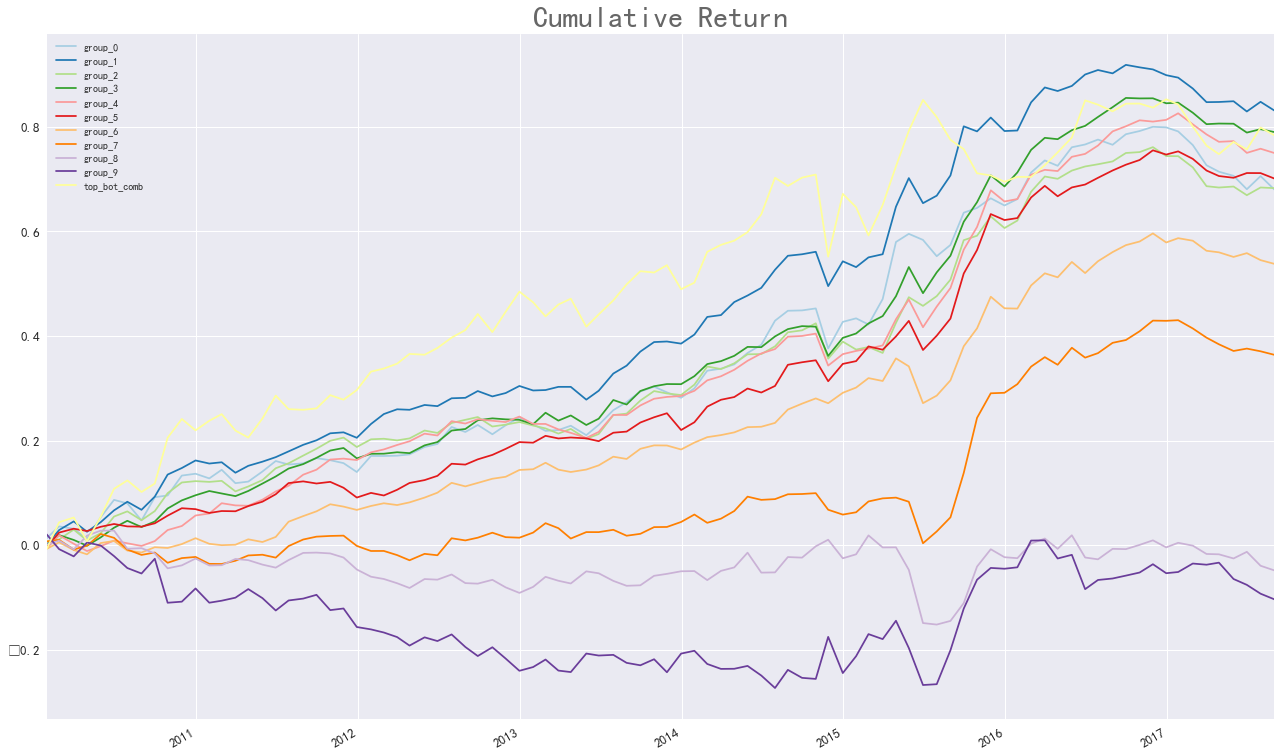

In [480]:
# simple cumulative return 
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
ReturnDF.astype(float).cumsum().plot(figsize=(22,14),ax=ax,  color=sns.color_palette("Paired",11),fontsize =13,title ='Cumulative Return')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

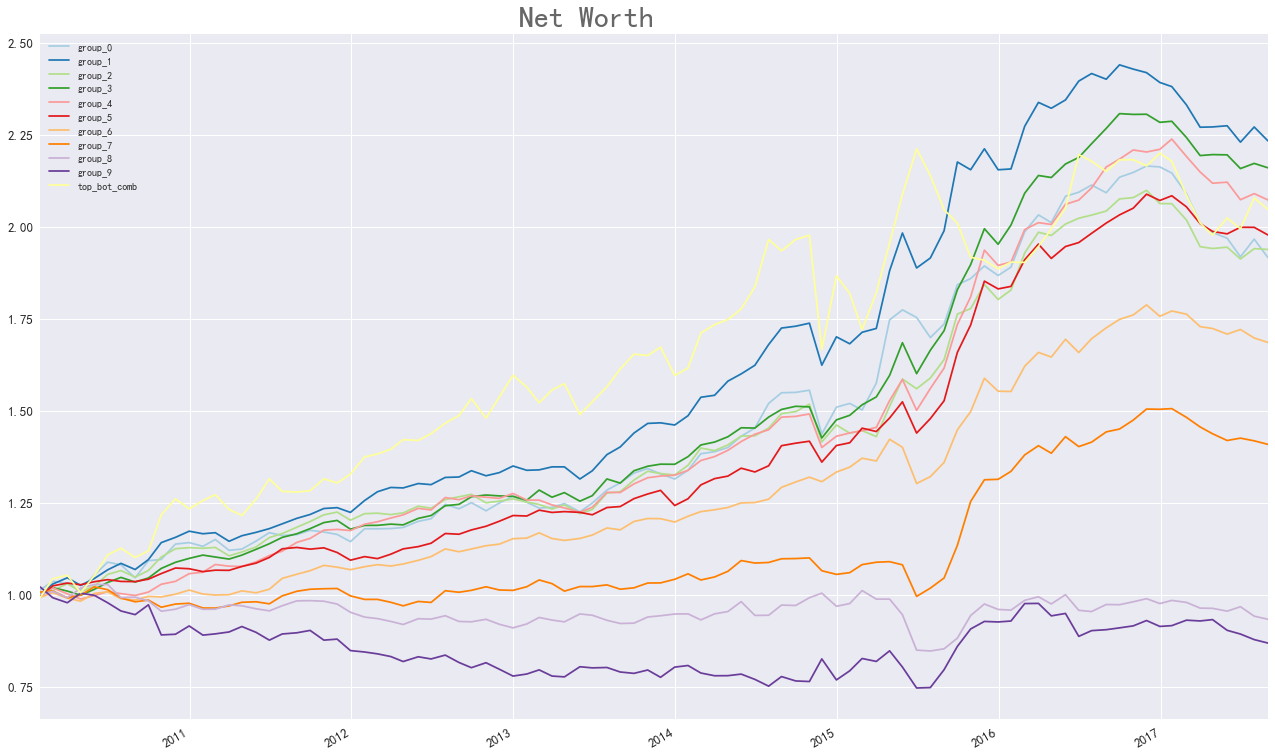

In [481]:
# Net worth plot 
netWorthDF = (ReturnDF.astype(float)+1).cumprod()
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
netWorthDF.plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",11),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [482]:
# Calc spearman correlation to investigate monotonicity
referSeries = pd.Series(index = netWorthDF.iloc[:,:-1].columns, data=range(len(netWorthDF.iloc[:,:-1].columns)))
monoDF = pd.DataFrame(index = netWorthDF.index, columns=['Spearman_Cor'], dtype = float)
for date in netWorthDF.index:
    monoDF.loc[date] = netWorthDF.iloc[:,:-1].loc[date].corr(referSeries,method='spearman')   

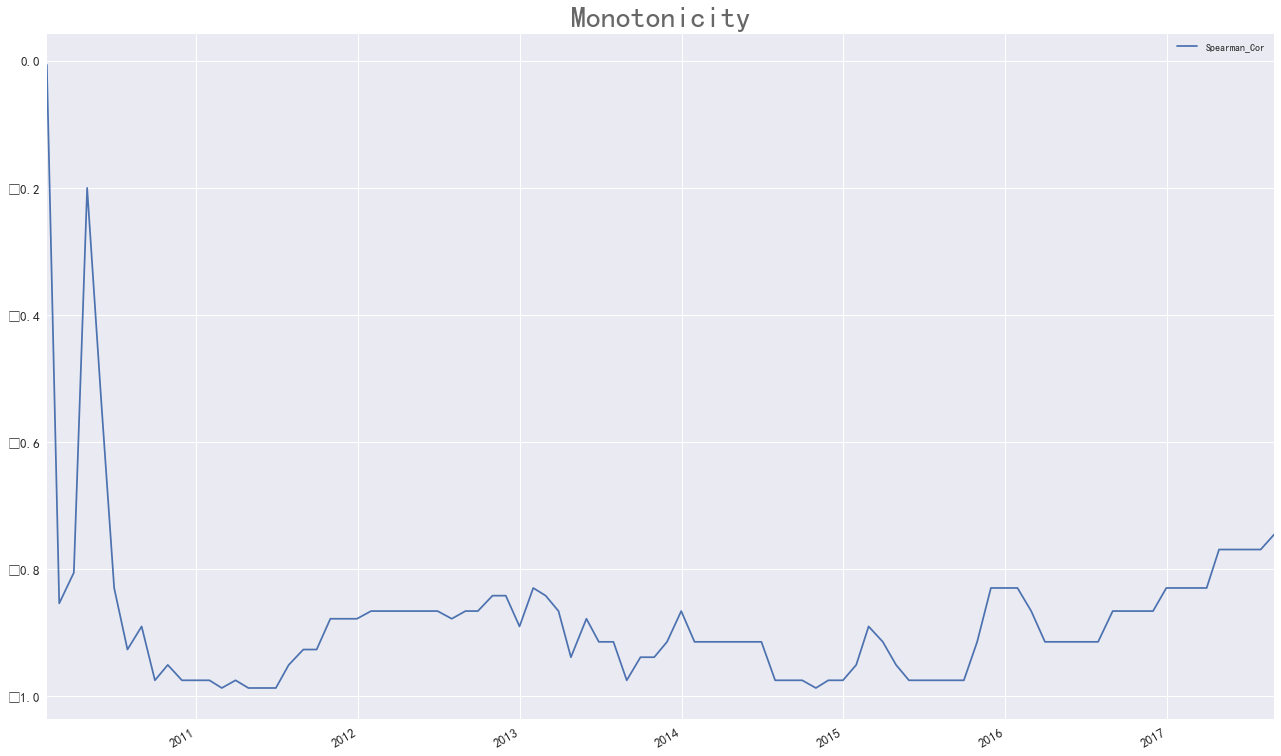

In [483]:
# Plot
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
monoDF.plot(figsize=(22,14),ax=ax,fontsize =13,title ='Monotonicity')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

In [484]:
# monotonicity information 
print monoDF.std()
print monoDF.median()

Spearman_Cor    0.137294
dtype: float64
Spearman_Cor   -0.915152
dtype: float64


In [485]:
# basic indicator
annualizedReturn = (1+ReturnDF.mean())**12 - 1
annualizedVol = ReturnDF.std()* np.sqrt(12)
sharpeRatio = annualizedReturn / annualizedVol 
print 'Annual Return:','\n',annualizedReturn,'\n\n','Annual Volatility:','\n',annualizedVol,'\n\n','Sharpe Ratio:''\n',sharpeRatio

Annual Return: 
group_0         0.092440
group_1         0.114007
group_2         0.092809
group_3         0.108081
group_4         0.102358
group_5         0.095415
group_6         0.072487
group_7         0.048528
group_8        -0.006300
group_9        -0.013452
top_bot_comb    0.107209
dtype: float64 

Annual Volatility: 
group_0         0.085609
group_1         0.080269
group_2         0.070178
group_3         0.066009
group_4         0.069184
group_5         0.066559
group_6         0.061426
group_7         0.074520
group_8         0.073639
group_9         0.099274
top_bot_comb    0.129783
dtype: float64 

Sharpe Ratio:
group_0         1.079796
group_1         1.420308
group_2         1.322466
group_3         1.637373
group_4         1.479512
group_5         1.433533
group_6         1.180068
group_7         0.651212
group_8        -0.085557
group_9        -0.135508
top_bot_comb    0.826064
dtype: float64


In [486]:
copyReturn = ReturnDF.copy()
copyReturn [copyReturn > copyReturn .mean()] =0
downsideRisk = ReturnDF.std(skipna = True) * np.sqrt(12)
downsideRisk

group_0         0.085609
group_1         0.080269
group_2         0.070178
group_3         0.066009
group_4         0.069184
group_5         0.066559
group_6         0.061426
group_7         0.074520
group_8         0.073639
group_9         0.099274
top_bot_comb    0.129783
dtype: float64

In [487]:
sortinoRatio = annualizedReturn / downsideRisk
sortinoRatio

group_0         1.079796
group_1         1.420308
group_2         1.322466
group_3         1.637373
group_4         1.479512
group_5         1.433533
group_6         1.180068
group_7         0.651212
group_8        -0.085557
group_9        -0.135508
top_bot_comb    0.826064
dtype: float64

In [488]:
# Max drawdown
maxdd = netWorthDF.copy()
maxdd.iloc[0] = 0
for date in netWorthDF.index[1:]:
    maxdd.loc[date] = 1-netWorthDF.loc[date]/netWorthDF.loc[:date].max()
maxddInfo = pd.concat([maxdd.max(),maxdd.idxmax()],axis=1)
maxddInfo.columns = ['Max_drawdown','Time']
maxddInfo

Max_drawdown       Time
group_0           0.114994 2017-08-31
group_1           0.086124 2017-06-30
group_2           0.088938 2017-06-30
group_3           0.064751 2017-06-30
group_4           0.073905 2017-08-31
group_5           0.055790 2015-06-30
group_6           0.084632 2015-06-30
group_7           0.095221 2015-06-30
group_8           0.175997 2015-07-31
group_9           0.268913 2015-06-30
top_bot_comb      0.157032 2014-11-28

In [489]:
# calmar Ratio
calmarRatio = annualizedReturn/ maxddInfo['Max_drawdown']
calmarRatio 

group_0         0.803867
group_1         1.323757
group_2         1.043524
group_3         1.669188
group_4         1.384990
group_5         1.710236
group_6         0.856491
group_7         0.509642
group_8        -0.035798
group_9        -0.050025
top_bot_comb    0.682723
dtype: float64

In [490]:
calmarRatio.loc[calmarRatio>2] = calmarRatio/ 2
calmarRatio

group_0         0.803867
group_1         1.323757
group_2         1.043524
group_3         1.669188
group_4         1.384990
group_5         1.710236
group_6         0.856491
group_7         0.509642
group_8        -0.035798
group_9        -0.050025
top_bot_comb    0.682723
dtype: float64

In [491]:
calmarRatio[calmarRatio>0] = calmarRatio /2
calmarRatio

group_0         0.401934
group_1         0.661878
group_2         0.521762
group_3         0.834594
group_4         0.692495
group_5         0.855118
group_6         0.428245
group_7         0.254821
group_8        -0.035798
group_9        -0.050025
top_bot_comb    0.341362
dtype: float64

In [492]:
calmarRatio

group_0         0.401934
group_1         0.661878
group_2         0.521762
group_3         0.834594
group_4         0.692495
group_5         0.855118
group_6         0.428245
group_7         0.254821
group_8        -0.035798
group_9        -0.050025
top_bot_comb    0.341362
dtype: float64

In [493]:
ReturnForPlot =ReturnDF.copy()

In [494]:
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(1+x.month) if x.month < 12 else\
                                             100*(x.year+1)+1) ### this shows the real time

In [495]:
### the following part is to save return data of every factor into one Dataframe

In [496]:
#---------------- the following part shows the show the difference of a risk factor across different market capitalzation size----#
#-------------  and different industries ------#

In [497]:
# show the difference of a risk factor through different market capitalzation size
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the tuple of the groups
# Inputs: 
# capdata: DATAFRAME ,the LFCAP DATA
# datelist: LIST, the datelist of the end month
def getGroupsbyCap(capdata, datelist):
    capdict ={}
    for date in datelist:
        capdataindice = capdata.loc[date]
        lower = capdataindice.quantile(1/3)
        upper = capdataindice.quantile(2/3)
        smallcap = capdataindice[capdataindice<=lower].index
        midcap = capdataindice[(lower<capdataindice) & (capdataindice<=upper)].index
        hugecap = capdataindice[capdataindice>upper].index
        capdict[date] = (smallcap,midcap,hugecap)
    return capdict

In [498]:
# industry number
grouplabel = np.random.choice(29,10,replace=False)
grouplabel

array([17,  6,  8, 27, 10, 18, 25, 20,  2, 12])

In [499]:
# show the difference of a risk factor through different industry
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the DICTIONARY of the groups of each industry on that day
# Inputs: 
# datelist: LIST, the datelist of the end month
# grouplable: LIST, the industry label,usually 3 of them is constant and other 3 is randomed  alike [2,3,6,15,18,25]
# industryDF: DATAFRAME,the industry dataframe(could )
def getIndustryDict(datelist,grouplabel,industryDF):
    industrydict = {}
    industryDF = industryDF.loc[datelist]
    for date in datelist:
        industryDFindice = industryDF.loc[date]
        industrydict[date] = {label:industryDFindice[industryDFindice == label].index for label in grouplabel}
    return industrydict

In [500]:
#------------------------------ Following part is to group  stocks within industry --------------------------

In [501]:
wholeIndList = np.array(range(29))

wholeIndDict = getIndustryDict(endOfMonthList,wholeIndList,indusDF)

In [502]:
multindexList = [endOfMonthList,wholeIndList]
induReturnDF  = pd.DataFrame(data=None, columns=totalGroupDict.values()[0].keys(),\
                             index=pd.MultiIndex.from_product(multindexList,names=['time','industry']),dtype=float)

In [503]:
# Group the stocks 
groupNumberThrottle = 10
for i,j in wholeIndDict.iteritems():
    print i
    factorIndice = factorData.loc[:i].tail()
    factorIndice = factorIndice[list(set(factorIndice.columns.tolist())- set(filterdict[date]))]  # Remove ST ,new and suspend stk
    for ind, stk in j.iteritems():
        intersection = list(set(factorIndice.columns.tolist()) & set(stk))
        if len(intersection) < groupNumberThrottle:
            induReturnDF.loc[i,ind] = 0
            continue
        else:
            stkgroup = ff.getStockGroup(factorIndice[intersection], groupNum=10, Mean_Num=1)
            for p,q in stkgroup.iteritems():
                try:
                    induReturnDF.loc[i,ind][p] = activeReturnData.loc[i][q].mean()
                except:
                    induReturnDF.loc[i,ind][p] = np.NaN

2016-12-30 00:00:00
2010-12-31 00:00:00
2017-08-31 00:00:00
2015-05-29 00:00:00
2014-02-28 00:00:00
2012-03-30 00:00:00
2014-07-31 00:00:00
2012-11-30 00:00:00
2016-09-30 00:00:00
2013-07-31 00:00:00
2012-08-31 00:00:00
2014-11-28 00:00:00
2012-07-31 00:00:00
2017-06-30 00:00:00
2012-04-27 00:00:00
2017-09-28 00:00:00
2016-05-31 00:00:00
2014-05-30 00:00:00
2012-02-29 00:00:00
2013-09-30 00:00:00
2015-02-27 00:00:00
2015-07-31 00:00:00
2011-06-30 00:00:00
2011-05-31 00:00:00
2010-10-29 00:00:00
2010-11-30 00:00:00
2013-03-29 00:00:00
2010-07-30 00:00:00
2015-11-30 00:00:00
2012-05-31 00:00:00
2017-03-31 00:00:00
2011-11-30 00:00:00
2011-07-29 00:00:00
2015-12-31 00:00:00
2011-02-28 00:00:00
2013-11-29 00:00:00
2016-03-31 00:00:00
2015-06-30 00:00:00
2011-04-29 00:00:00
2010-08-31 00:00:00
2013-01-31 00:00:00
2015-01-30 00:00:00
2011-12-30 00:00:00
2010-03-31 00:00:00
2011-03-31 00:00:00
2017-01-26 00:00:00
2011-09-30 00:00:00
2010-04-30 00:00:00
2016-10-31 00:00:00
2011-10-31 00:00:00


In [504]:
finalReturn = induReturnDF.mean(level = 'time')
finalReturn.sort_index(axis=1,inplace=True)

In [505]:
sortGroups = finalReturn[['group_0','group_9']].cumsum().iloc[-1].sort_values(ascending = False).index
top, bot = sortGroups[0], sortGroups[-1]

# Add another column
finalReturn['top_bot_comb'] = finalReturn[top] - finalReturn[bot]

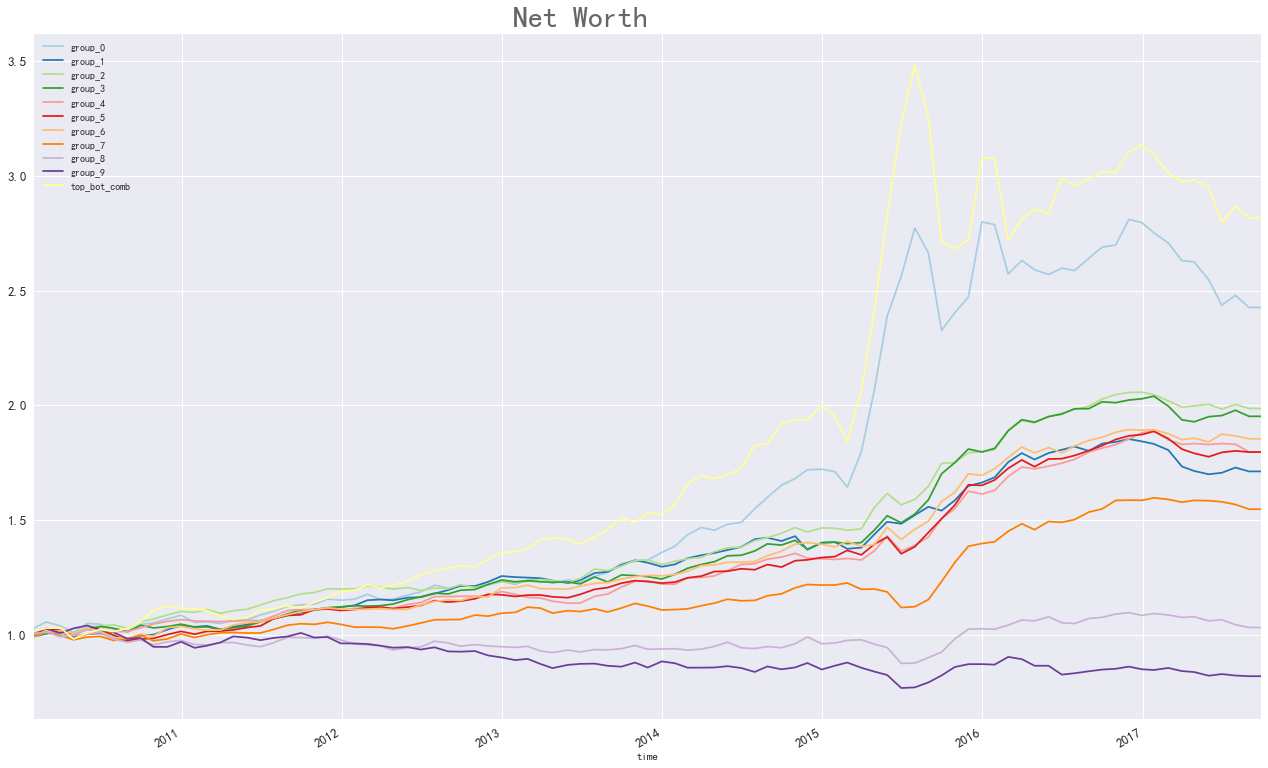

In [506]:
indNetWorth = (finalReturn+1).cumprod()
fig = plt.figure(figsize=(14,9))
# Add a subplot
ax = fig.add_subplot(111)
indNetWorth.plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",11),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [507]:
# basic indicator
annualizedReturnNew = (1+finalReturn.mean())**12 - 1
annualizedVolNew = finalReturn.std()* np.sqrt(12)
sharpeRatioNew = annualizedReturnNew / annualizedVolNew 
print 'Annual Return:','\n',annualizedReturnNew,'\n\n','Annual Volatility:','\n',annualizedVolNew,'\n\n','Sharpe Ratio:''\n',sharpeRatioNew

Annual Return: 
group_0         0.130400
group_1         0.073387
group_2         0.094081
group_3         0.091786
group_4         0.080043
group_5         0.080137
group_6         0.084448
group_7         0.059829
group_8         0.006013
group_9        -0.023111
top_bot_comb    0.156816
dtype: float64 

Annual Volatility: 
group_0         0.131077
group_1         0.053621
group_2         0.052788
group_3         0.055432
group_4         0.052334
group_5         0.055168
group_6         0.053590
group_7         0.059809
group_8         0.061263
group_9         0.066197
top_bot_comb    0.158439
dtype: float64 

Sharpe Ratio:
group_0         0.994832
group_1         1.368608
group_2         1.782247
group_3         1.655834
group_4         1.529457
group_5         1.452600
group_6         1.575818
group_7         1.000338
group_8         0.098153
group_9        -0.349125
top_bot_comb    0.989753
dtype: float64


In [508]:
copyReturn = finalReturn.copy()
copyReturn[copyReturn > copyReturn.mean()] = 0
downsideRiskNew = copyReturn.std(skipna = True) * np.sqrt(12)
downsideRiskNew

group_0         0.062298
group_1         0.027704
group_2         0.019976
group_3         0.023027
group_4         0.022852
group_5         0.027643
group_6         0.022654
group_7         0.028712
group_8         0.037009
group_9         0.042834
top_bot_comb    0.083419
dtype: float64

In [509]:
sortinoRatioNew = annualizedReturnNew / downsideRiskNew
sortinoRatioNew

group_0         2.093172
group_1         2.648959
group_2         4.709614
group_3         3.986001
group_4         3.502645
group_5         2.898983
group_6         3.727742
group_7         2.083802
group_8         0.162476
group_9        -0.539547
top_bot_comb    1.879845
dtype: float64

In [510]:
# Max drawdown
maxdd1 = indNetWorth.copy()
maxdd1.iloc[0] = 0
for date in indNetWorth.index[1:]:
    maxdd1.loc[date] = 1-indNetWorth.loc[date]/indNetWorth.loc[:date].max()
maxddInfo1 = pd.concat([maxdd1.max(),maxdd1.idxmax()],axis=1)
maxddInfo1.columns = ['Max_drawdown','Time']
maxddInfo1

Max_drawdown       Time
group_0           0.160879 2015-09-30
group_1           0.082800 2017-05-31
group_2           0.035716 2017-06-30
group_3           0.054789 2017-04-28
group_4           0.049260 2017-08-31
group_5           0.058598 2017-05-31
group_6           0.043484 2010-08-31
group_7           0.087200 2015-06-30
group_8           0.143859 2015-06-30
group_9           0.261435 2015-06-30
top_bot_comb      0.230080 2015-10-30

In [511]:
# calmar Ratio
calmarRatioNew = annualizedReturnNew/ maxddInfo1['Max_drawdown']
calmarRatioNew

group_0         0.810545
group_1         0.886318
group_2         2.634119
group_3         1.675255
group_4         1.624917
group_5         1.367584
group_6         1.942049
group_7         0.686118
group_8         0.041799
group_9        -0.088401
top_bot_comb    0.681570
dtype: float64

In [512]:
def str_to_datetime_format(string):
    return '%Y/%m/%d' if '/'in string else '%Y-%m-%d'

In [513]:
print  downsideRisk['top_bot_comb'],sortinoRatio['top_bot_comb']

0.129783470506 0.826063624511


In [514]:
# save factor performance summary into csv file
if np.isnan(monoDF.median().values[0]) and np.isnan(sharpeRatio['top_bot_comb']):
    raise  Exception( 'Error! Please check the original data!')
savepath = 'C:/Users/LZJF_02/Desktop/myownliarbry'
infodata = np.array([[startTime,endTime,monoDF.median().values[0],monoDF.std().values[0],annualizedReturn['top_bot_comb'],annualizedVol['top_bot_comb'],sharpeRatio['top_bot_comb'],\
    downsideRisk['top_bot_comb'],sortinoRatio['top_bot_comb'], maxddInfo['Max_drawdown'].loc['top_bot_comb'],calmarRatio['top_bot_comb']]])
totalInfo = pd. DataFrame(index =[sololist[0].split('.')[0]],columns = ['Start_time','End_time','Mono_median','Mono_std','Annualized_return','Annualized_volatility','Sharpe_ratio','Downside_Risk',
                                                     'Sortino_ratio','Max_drawdown','Calmar_Ratio'],data= infodata)
totalInfo.index.name = 'Factor_Name'
try:
    readfacInfo = pd.read_csv(savepath+'/'+'factorInfo.csv',infer_datetime_format=True,parse_dates=[0],index_col=0)
except:  
    readfacInfo = totalInfo
    readfacInfo.to_csv(savepath+'/'+'factorInfo.csv',na_rep='NaN')
factorName = sololist[0].split('.')[0]
if  factorName in readfacInfo.index:
    print factorName+ ' '+'already in the file!'
    try:
        begin = datetime.strptime(readfacInfo.loc[factorName]['Start_time'].split()[0],str_to_datetime_format(readfacInfo.loc[factorName]['Start_time']))
        end = datetime.strptime(readfacInfo.loc[factorName]['End_time'].split()[0],str_to_datetime_format(readfacInfo.loc[factorName]['End_time']))
    except:
        print 'No convert needed!The time type is already python.datetime!'
        begin = readfacInfo.loc[factorName]['Start_time']
        end = readfacInfo.loc[factorName]['End_time']
    print begin,startTime, end, endTime
    if  begin > startTime or  end < endTime:
        print  'Update needed'
        print  readfacInfo.loc[factorName].values 
        print infodata.flatten()
        readfacInfo.loc[factorName] = infodata.flatten()
    updatedInfo = readfacInfo
else:
    updatedInfo = pd.concat([readfacInfo,totalInfo])
    updatedInfo = updatedInfo.rename(columns = {'End_Time': 'End_time'})
updatedInfo.to_csv(savepath+'/'+'factorInfo.csv',na_rep='NaN')

OwnfactorMassIndex already in the file!
2010-01-01 00:00:00 2010-01-01 00:00:00 2017-02-28 00:00:00 2017-09-28 00:00:00
Update needed
['2010-01-01 00:00:00' '2017-02-28 00:00:00' -0.91515151515151516
 0.14545567721598007 0.12470907479517755 0.1326922822290709
 0.93983668605449355 0.1326922822290709 0.93983668605449355
 0.15948418092905906 0.39097631523295112]
[datetime.datetime(2010, 1, 1, 0, 0) datetime.datetime(2017, 9, 28, 0, 0)
 -0.91515151515151516 0.1372941334756633 0.10720940404793278
 0.12978347050617375 0.82606362451089532 0.12978347050617375
 0.82606362451089532 0.15703195389193247 0.34136174641790745]


In [515]:
updatedInfo

Start_time  \
Factor_Name                                                         
Own_Factor_Turnover_Volatility_deviation_20D  2010-01-01 00:00:00   
Own_Factor_ILLQ-1d                            2010-01-01 00:00:00   
Own_Factor_Idiosyncratic_Volatility           2010-01-01 00:00:00   
Own_Factor_ADJ_Turnover_Volatility_20D        2010-01-01 00:00:00   
LZ_GPA_VAL_PE                                 2010-01-01 00:00:00   
LZ_GPA_VAL_PB                                 2010-01-01 00:00:00   
LZ_GPA_VAL_PS                                 2010-01-01 00:00:00   
LZ_GPA_FIN_IND_QFA_YOYGR                      2010-01-01 00:00:00   
LZ_GPA_FIN_IND_YOYBPS                         2010-01-01 00:00:00   
LZ_GPA_FIN_IND_QFA_YOYNETPROFIT               2010-01-01 00:00:00   
LZ_GPA_FIN_IND_CAPITALIZEDTODA                2010-01-01 00:00:00   
LZ_GPA_FIN_IND_CASHRATIO                      2010-01-01 00:00:00   
LZ_GPA_DERI_Momentum_1M                       2010-01-01 00:00:00   
LZ_GPA_TURNOVER_TurnoverAvg_3M                2010-01-01 00:00:00   
LZ_GPA_VAL_TURN                               2010-01-01 00:00:00   
Own_Factor_Volatility_90d                     2010-01-01 00:00:00   
Own_Factor_DDA-20d                            2010-01-01 00:00:00   
Own_Factor_Skewness_250d                      2010-01-01 00:00:00   
LZ_GPA_FIN_IND_OCFTODEBT                      2010-01-01 00:00:00   
Own_Factor_Return_Skew_250D                   2010-01-01 00:00:00   
Own_Factor_5_20_return_deviation_1D           2010-01-01 00:00:00   
Own_Factor_downside_risk_252D                 2010-01-01 00:00:00   
Own_Factor_sortino_ratio_20D                  2010-01-01 00:00:00   
Own_Factor_excess_return_20D                  2010-01-01 00:00:00   
Uqer_factor_AD20                              2010-01-01 00:00:00   
Uqer_factor_ADTM                              2010-01-01 00:00:00   
Uqer_factor_ATR6                              2010-01-01 00:00:00   
Uqer_factor_Aroon                             2010-01-01 00:00:00   
Uqer_factor_BIAS10                            2010-01-01 00:00:00   
LZ_GPA_FIN_IND_ROE                            2010-01-01 00:00:00   
Own_Factor_ROE_Volatility_60D                 2010-01-01 00:00:00   
Own_Factor_ROE_Volatility_120D                2010-01-01 00:00:00   
Own_Factor_ROE_Volatility_250D                2010-01-01 00:00:00   
Uqer_factor_CCI10                             2010-01-01 00:00:00   
Uqer_factor_KDJ_K                             2010-01-01 00:00:00   
Uqer_factor_ROC6                              2010-01-01 00:00:00   
Uqer_factor_RVI                               2010-01-01 00:00:00   
Uqer_factor_CMO                               2010-01-01 00:00:00   
Uqer_factor_RSI                               2010-01-01 00:00:00   
Uqer_factor_Skewness                          2010-01-01 00:00:00   
Uqer_factor_OBV20                             2010-01-01 00:00:00   
Uqer_factor_MTM                               2010-01-01 00:00:00   
Uqer_factor_PVT6                              2010-01-01 00:00:00   
Own_Factor_Non_Linear_Size                    2010-01-01 00:00:00   
Own_Factor_Beta_1D                            2014-01-01 00:00:00   
Uqer_factor_REC                               2010-01-01 00:00:00   
Uqer_factor_DAREC                             2010-01-01 00:00:00   
Uqer_factor_GREC                              2010-01-01 00:00:00   
Uqer_factor_REVS20                            2010-01-01 00:00:00   
Uqer_factor_MA10RegressCoeff12                2010-01-01 00:00:00   
Uqer_factor_REVS5                             2010-01-01 00:00:00   
Uqer_factor_WVAD                              2010-01-01 00:00:00   
Uqer_factor_Hurst                             2010-01-01 00:00:00   
Uqer_factor_MassIndex                         2010-01-01 00:00:00   
Uqer_factor_KlingerOscillator                 2010-01-01 00:00:00   
OwnfactorMassIndex                            2010-01-01 00:00:00   

                                                    

In [516]:
'''define the risk preference weight indice before perform kmeans clustering'''

'define the risk preference weight indice before perform kmeans clustering'

In [517]:
updatedInfo['Mono_median'] = np.abs(updatedInfo['Mono_median'])
mat =updatedInfo.dropna(axis=0).iloc[:,2:].as_matrix()
# Using sklearn
km = KMeans(n_clusters=4)
result = km.fit(mat)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame(data=labels, columns=['cluster'],index = updatedInfo.index)

In [518]:
results.groupby(['cluster'])

In [519]:
for name,group in results.groupby(['cluster']):
    print group

                    cluster
Factor_Name                
LZ_GPA_VAL_TURN           0
Own_Factor_DDA-20d        0
Uqer_factor_ATR6          0
                                cluster
Factor_Name                            
Own_Factor_Skewness_250d              1
Own_Factor_sortino_ratio_20D          1
Uqer_factor_AD20                      1
Uqer_factor_ADTM                      1
Uqer_factor_Aroon                     1
Uqer_factor_BIAS10                    1
Uqer_factor_CCI10                     1
Uqer_factor_ROC6                      1
Uqer_factor_CMO                       1
Uqer_factor_RSI                       1
Uqer_factor_OBV20                     1
Uqer_factor_MTM                       1
Uqer_factor_PVT6                      1
Uqer_factor_REC                       1
Uqer_factor_DAREC                     1
Uqer_factor_MA10RegressCoeff12        1
Uqer_factor_REVS5                     1
Uqer_factor_WVAD                      1
Uqer_factor_Hurst                     1
Uqer_factor_MassInde

In [520]:
(maxddInfo1-maxddInfo)

Max_drawdown       Time
group_0           0.045885  -701 days
group_1          -0.003324   -30 days
group_2          -0.053221     0 days
group_3          -0.009962   -63 days
group_4          -0.024646     0 days
group_5           0.002807   701 days
group_6          -0.041148 -1764 days
group_7          -0.008021     0 days
group_8          -0.032137   -31 days
group_9          -0.007479     0 days
top_bot_comb      0.073048   336 days

In [521]:
#--------------------------------------  Section End   -------------------------------------

In [522]:
industryDict = getIndustryDict(endOfMonthList,grouplabel,indusDF)

In [523]:
capDict=getGroupsbyCap(LFCAPDF,endOfMonthList)

In [524]:
templist=[endOfMonthList,['mean','median','std']]
capGroupsDF = pd.DataFrame(data=None, columns=['small','mid','huge'],index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)
indusGroupDF  = pd.DataFrame(data=None, columns=grouplabel,index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)

In [525]:
for date in endOfMonthList:
    factorindice = factorData.loc[date]
    smallindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][0]))]
    midindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][1]))]
    hugeindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][2]))]
    capGroupsDF.loc[date,'small'] = [smallindice.mean(),smallindice.median(),smallindice.std()]
    capGroupsDF.loc[date,'mid'] = [midindice.mean(),midindice.median(),midindice.std()]
    capGroupsDF.loc[date,'huge'] = [hugeindice.mean(),hugeindice.median(),hugeindice.std()]
    for i in grouplabel:
        #print grouplabel
        inDFIndice = factorindice.loc[list(set(factorindice.index) & set(industryDict[date][i]))]
        indusGroupDF.loc[date,i] = [inDFIndice.mean(),inDFIndice.median(),inDFIndice.std()]
indusGroupDF.rename(columns = {i:u''+explanationDict[i]+'' for i in grouplabel},inplace=True)

In [526]:
indusGroupDF

医药         建筑       轻工制造         传媒       电力设备  \
time       stats                                                           
2010-01-29 mean    24.812738  24.988991  24.499089  25.551852  24.695847   
           median  25.033234  24.885788  24.868517  25.619635  25.019733   
           std      3.189364   1.825361   3.529043   2.107900   2.844813   
2010-02-26 mean    24.164765  24.450587  24.476342  23.863053  24.225659   
           median  24.338102  24.299870  24.385727  23.795912  24.383072   
           std      3.160104   1.012132   1.930081   1.050667   2.522203   
2010-03-31 mean    24.314578  24.539460  24.188614  24.664862  24.636291   
           median  24.442477  24.646287  24.251301  24.350807  24.518240   
           std      3.263460   0.930011   2.078534   1.055877   1.292791   
2010-04-30 mean    25.821612  25.999233  26.177856  26.326031  26.021197   
           median  26.033315  26.260988  26.139679  26.633207  26.323547   
           std      3.395654   1.390364   1.024480   1.466255   2.055708   
2010-05-31 mean    24.628566  24.596802  24.760605  24.008941  24.763470   
           median  25.155873  24.902578  24.967854  24.259005  25.027200   
           std      3.152358   2.162234   1.932200   1.285413   2.178046   
2010-06-30 mean    23.278812  23.190806  23.574749  23.663627  23.167300   
           median  23.625612  23.382287  23.542891  23.824301  23.567881   
           std      2.942578   2.422329   0.902696   1.433812   2.629132   
2010-07-30 mean    24.726277  24.083889  24.550285  22.929463  24.137419   
           median  24.759276  24.529573  24.452438  23.273931  24.356503   
           std      1.404141   2.845998   1.126159   2.501942   2.285789   
2010-08-31 mean    25.017584  24.611204  24.815029  25.023361  24.866021   
           median  25.081104  24.943801  25.298080  24.896149  24.851678   
           std      0.900777   3.175128   2.601250   1.449490   2.517661   
2010-09-30 mean    25.342134  24.957513  25.314356  25.544000  24.769682   
           median  25.271391  25.312701  25.516040  25.636099  25.135721   
           std      0.832044   3.411618   2.511040   1.244992   2.343549   
2010-10-29 mean    25.389960  25.147078  25.241421  25.133620  25.238570   
           median  25.319286  25.669430  25.146738  25.352204  25.452479   
           std      1.600084   3.501440   1.344471   2.380319   2.954646   
...                      ...        ...        ...        ...        ...   
2016-12-30 mean    23.150740  24.495495  24.002977  23.828677  23.948337   
           median  24.686897  25.013799  24.870598  24.978160  24.720776   
           std      5.524710   4.529870   5.510327   4.967624   4.808925   
2017-01-26 mean    22.690325  24.021045  23.806028  23.344595  23.698730   
           median  24.047191  24.505115  24.808345  24.719061  24.648371   
           std      5.642198   3.866249   5.901873   5.196762   5.102811   
2017-02-28 mean    22.619573  22.775094  24.049413  22.594168  22.960326   
           median  23.501340  23.563722  24.491820  23.780591  23.746920   
           std      5.684466   4.297762   4.881123   5.380307   4.761129   
2017-03-31 mean    22.739729  23.516914  24.095967  23.921110  23.669564   
           median  24.272068  24.580821  24.819933  24.684369  24.687750   
           std      5.580238   5.243986   4.074471   4.603021   5.301475   
2017-04-28 mean    24.288018  24.484356  25.621195  24.834698  24.934836   
           median  26.329188  25.852212  26.320252  25.944251  25.958659   
           std      6.721338   6.009474   4.630016   5.556858   5.072337   
2017-05-31 mean    23.220857  23.400376  22.798233  23.620525  23.636105   
           median  24.705681  24.731682  24.275668  25.277024  24.607641   
           std      6.303656   5.612274   5.374527   6.296629   5.443969   
2017-06-30 mean    21.953698  21.897973  21.213435  21.885641  21.924342   
           median  23.757867  23.676829  23.486190  23.422359  23.245884  

In [527]:
capGroupsDF.head()

small        mid       huge
time       stats                                  
2010-01-29 mean    23.794612  24.778929  25.094443
           median  24.041380  24.944407  25.105654
           std      2.652860   1.995234   1.828089
2010-02-26 mean    23.772330  24.408874  24.422544
           median  23.872388  24.355656  24.252194

In [528]:
newstack = capGroupsDF.stack().unstack('stats').reset_index()
newstack = newstack.rename(columns = {'level_1':'cap'})
newstack = newstack.pivot_table(index='time',columns='cap')

In [529]:
newstack.head()

stats            mean                           median                        \
cap              huge        mid      small       huge        mid      small   
time                                                                           
2010-01-29  25.094443  24.778929  23.794612  25.105654  24.944407  24.041380   
2010-02-26  24.422544  24.408874  23.772330  24.252194  24.355656  23.872388   
2010-03-31  24.206069  24.204984  23.938622  24.248707  24.359172  24.102623   
2010-04-30  26.235313  25.799460  24.644803  26.315322  26.071758  24.984284   
2010-05-31  25.105963  24.571782  23.902465  25.222387  24.924149  24.186245   

stats            std                      
cap             huge       mid     small  
time                                      
2010-01-29  1.828089  1.995234  2.652860  
2010-02-26  1.346465  1.878936  2.396231  
2010-03-31  1.271534  2.359573  2.302728  
2010-04-30  1.766960  2.566230  2.708384  
2010-05-31  1.657410  2.362957  2.267167

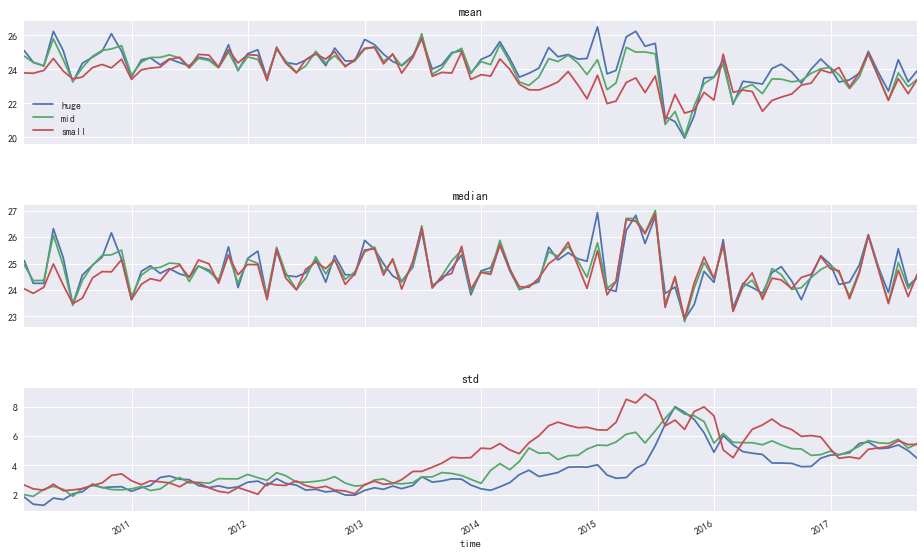

In [530]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstack.columns.levels[0],range(len(newstack.columns.levels[0]))):
    newstack[label].plot(ax=axs[num],legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [531]:
newstackInd = indusGroupDF.stack().unstack('stats').reset_index()
newstackInd = newstackInd.rename(columns = {'level_1':'industry'})
newstackInd = newstackInd.pivot_table(index='time',columns='industry')

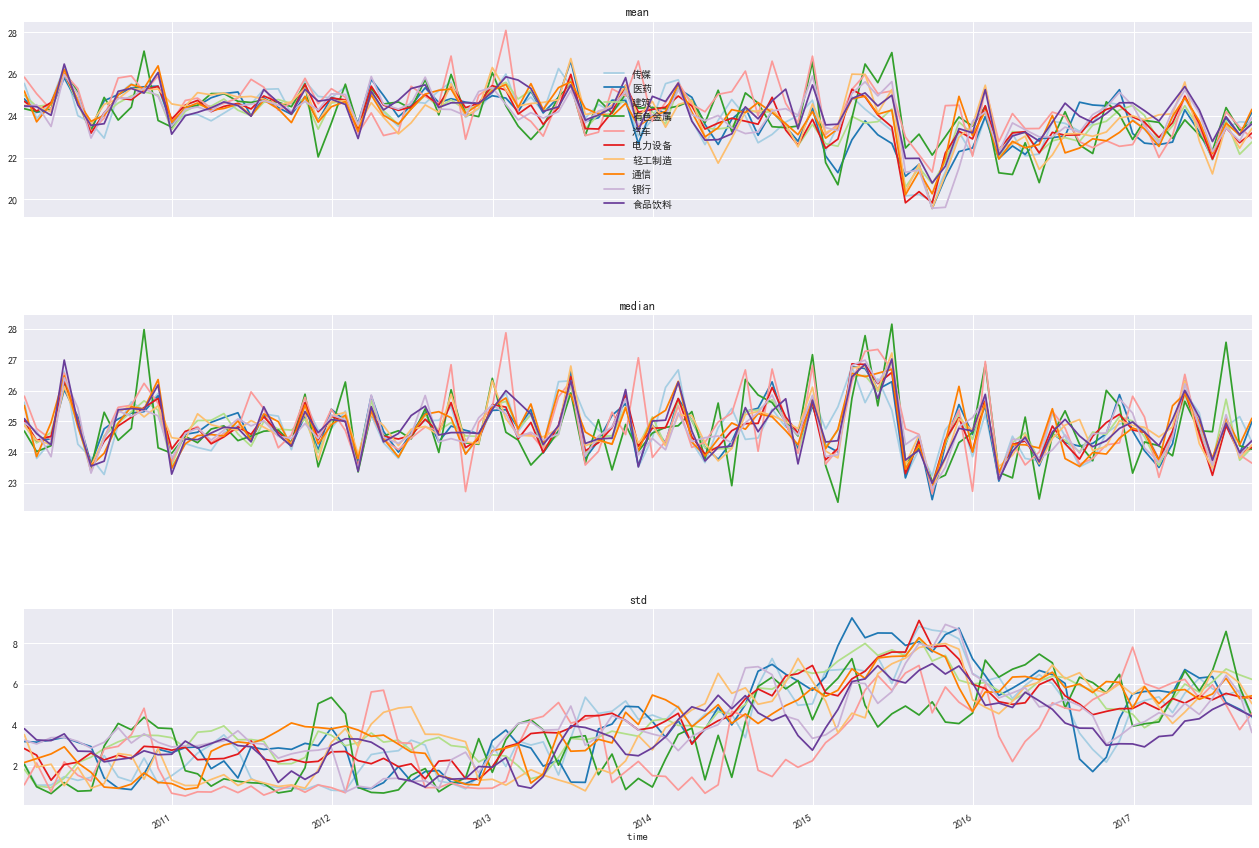

In [532]:
fig, axs = plt.subplots(3,1, figsize=(22, 16), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstackInd.columns.levels[0],range(len(newstackInd.columns.levels[0]))):
    newstackInd[label].plot(ax=axs[num],color=sns.color_palette("Paired",10),legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [533]:
capcopy=capGroupsDF.copy()
copydata=capcopy.reset_index()

In [534]:
copydata.pivot_table(index='time',columns='stats').head()

huge                             mid                       \
stats            mean     median       std       mean     median       std   
time                                                                         
2010-01-29  25.094443  25.105654  1.828089  24.778929  24.944407  1.995234   
2010-02-26  24.422544  24.252194  1.346465  24.408874  24.355656  1.878936   
2010-03-31  24.206069  24.248707  1.271534  24.204984  24.359172  2.359573   
2010-04-30  26.235313  26.315322  1.766960  25.799460  26.071758  2.566230   
2010-05-31  25.105963  25.222387  1.657410  24.571782  24.924149  2.362957   

                small                       
stats            mean     median       std  
time                                        
2010-01-29  23.794612  24.041380  2.652860  
2010-02-26  23.772330  23.872388  2.396231  
2010-03-31  23.938622  24.102623  2.302728  
2010-04-30  24.644803  24.984284  2.708384  
2010-05-31  23.902465  24.186245  2.267167

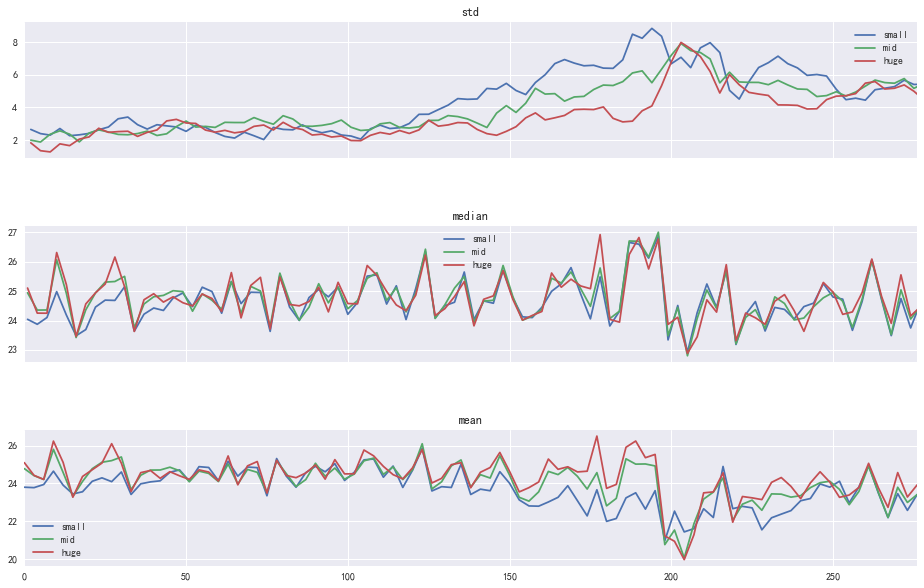

In [535]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(set(copydata['stats']),range(len(set(copydata['stats'])))):
    #print label,num
    dataslice = copydata[copydata['stats']==label]
    dataslice.plot(ax=axs[num])
    axs[num].set_title(label)